In [4]:
import torch.nn as nn
model = nn.Sequential(
          nn.Conv2d(3, 1000, 3), # мистический свёрточный слой
          nn.ReLU(),
          nn.Flatten(),
          nn.Linear(1000, 10),
          nn.Softmax(dim=   1),
        )

print("Количество весов нейросети = ", sum(p.numel() for p in model.parameters()))

Количество весов нейросети =  38010


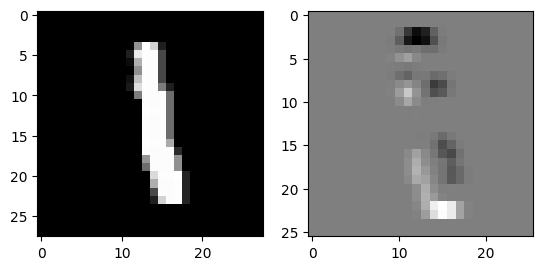

In [5]:
from PIL import Image
from matplotlib import pyplot as plt
import torch
from torchvision.transforms.functional import to_tensor

image = Image.open(r'D:\first_sprint\img.png')
image_tensor = to_tensor(image) # тензор [1, 28, 28]

# добавлено ещё одно измерение, чтобы получить [1, 1, 28, 28]
image_tensor = image_tensor.unsqueeze(0) 

kernel = torch.Tensor([[[[3, 10, 3], 
                         [0, 0, 0], 
                         [-3, -10, -3]]]])

result = torch.nn.functional.conv2d(image_tensor, kernel)

# визуализация
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.imshow(result[0][0], cmap = 'gray')

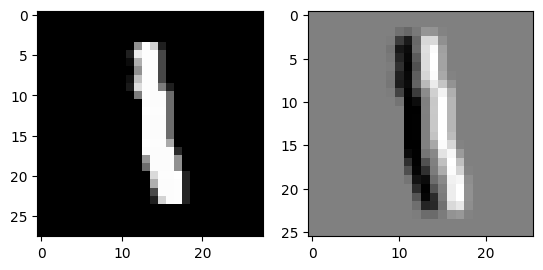

In [6]:
from PIL import Image
from matplotlib import pyplot as plt
import torch
from torchvision.transforms.functional import to_tensor

image = Image.open(r'D:\first_sprint\img.png')
image_tensor = to_tensor(image) # тензор [1, 28, 28]

# добавлено ещё одно измерение, чтобы получить [1, 1, 28, 28]
image_tensor = image_tensor.unsqueeze(0) 

kernel = torch.Tensor([[[[3, 0, -3], 
                         [10, 0, -10], 
                         [3, 0, -3]]]])

result = torch.nn.functional.conv2d(image_tensor, kernel)

# визуализация
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.imshow(result[0][0], cmap = 'gray')

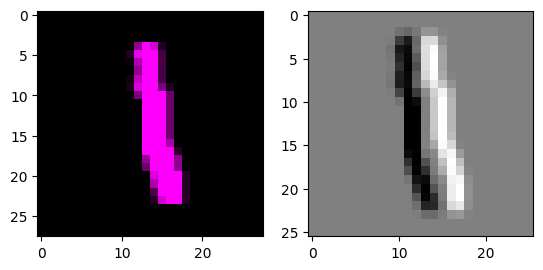

In [8]:
from PIL import Image
from matplotlib import pyplot as plt
import torch
import numpy as np
from torchvision.transforms.functional import to_tensor

image = Image.open(r'D:\first_sprint\img_colored.png')
image_tensor = to_tensor(image) # тензор [1, 3, 28, 28]
image_tensor = image_tensor.unsqueeze(0) 

kernel = np.array([[3, 0, -3], # обычный фильтр вертикальных линий
                   [10, 0, -10],
                   [3, 0, -3]])

kernel_3D = np.tile(kernel, (3, 1, 1)) # трёхмерный фильтр вертикальных линий
kernel_3D = torch.Tensor(kernel_3D) 
kernel_3D = kernel_3D.unsqueeze(0) # приведён к форме [1, 3, 3, 3]

result = torch.nn.functional.conv2d(image_tensor, kernel_3D)

# визуализация
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.imshow(result[0][0], cmap = 'gray')

In [11]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from torchvision.transforms.functional import to_tensor
import torch.nn as nn

image = Image.open(r'D:\first_sprint\img_colored.png')
image_tensor = to_tensor(image)
image_tensor = image_tensor.unsqueeze(0)

conv_layer = nn.Conv2d(3, 20, 3)
result = conv_layer(image_tensor).detach()

print("Размерность тензора: ", result.shape) 

Размерность тензора:  torch.Size([1, 20, 26, 26])
